In [2]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import warnings
warnings.filterwarnings("ignore")

### Alice in WonderLand

In [4]:
text = open('./source/Alice.txt').read()
# stopwords: 영어의 관사, 대명사 제거
stopwords = set(STOPWORDS) # set으로 만듦으로써 중복 제거
# add: 특정 단어를 추가하고 싶을 때
stopwords.add('said')

In [5]:
print(stopwords)

{'an', 'can', 'between', 'it', 'into', 'and', "who's", 'other', "he'd", "he'll", 'not', 'its', 'were', "what's", "haven't", 'a', 'being', "i'd", 'she', "doesn't", 'both', 'own', 'the', 'www', 'her', 'some', 'me', 'before', 'their', 'that', "that's", 'k', 'off', 'should', 'with', 'your', 'too', 'as', 'am', 'otherwise', 'until', 'most', 'is', "weren't", "didn't", 'our', 'ours', "you'll", "they're", 'has', 'further', 'have', 'therefore', 'does', 'also', 'nor', 'if', "we'd", 'said', 'or', 'ought', 'cannot', 'ourselves', 'only', "we'll", 'how', 'where', 'had', 'what', "when's", 'because', 'com', 'himself', 'here', "hadn't", "how's", 'at', 'do', 'be', 'down', "she'll", 'up', "we've", 'who', 'against', 'those', 'there', 'these', 'over', 'we', 'such', "i'll", "you've", 'same', 'by', 'doing', "she's", "won't", 'when', "i'm", "hasn't", 'theirs', 'for', 'under', 'above', 'below', 'more', 'did', 'r', 'him', 'once', 'after', "they'll", 'from', "he's", "here's", "let's", "there's", 'would', 'few', '

In [6]:
wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)
wc = wc.generate(text)

In [7]:
# wc.words_: 단어의 빈도수(비율)
keys = list(wc.words_.keys())
values = list(wc.words_.values())

for i in range(10):
    print(f'{keys[i]}: {values[i]}')
# Alice in Wonderland이니까 Alice가 제일 많이 나오겠지?

Alice: 1.0
little: 0.29508196721311475
one: 0.27595628415300544
know: 0.2459016393442623
went: 0.226775956284153
thing: 0.2185792349726776
time: 0.2103825136612022
Queen: 0.20765027322404372
see: 0.1830601092896175
King: 0.17486338797814208


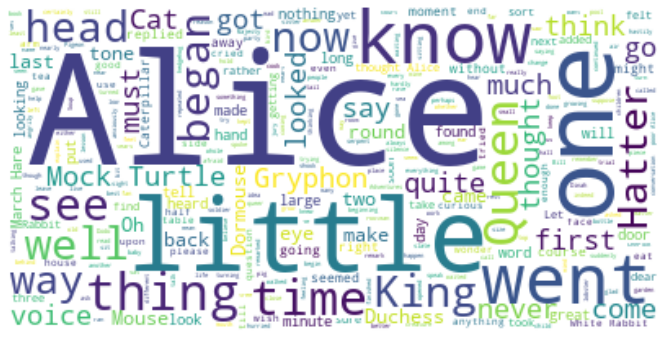

In [8]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear') # Image Show
plt.axis('off')
plt.show()

- 밑그림에다 표시하기

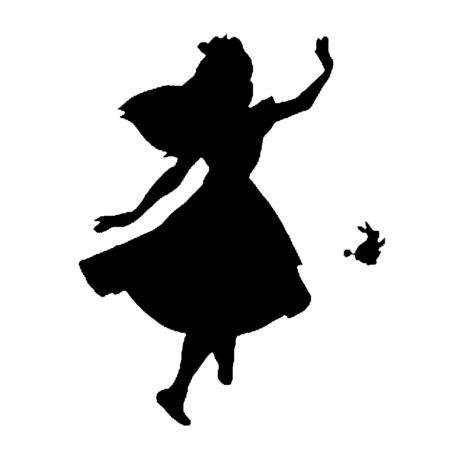

In [9]:
mask = np.array(Image.open('./source/Alice_mask.png'))

plt.figure(figsize=(8,8))
plt.imshow(mask, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

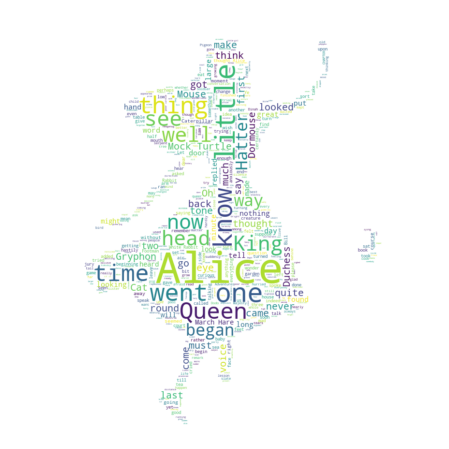

In [10]:
# wc 옵션에 mask image를 준다
wc = WordCloud(background_color='white', max_words=2000, mask = mask, stopwords=stopwords)
wc = wc.generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wc, cmap = plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

- Starwars A new hope

In [11]:
text = open('./source/A_new_hope.txt').read()
text = text.replace('HAN','han')
text = text.replace("LUKE'S",'Luke')

mask = np.array(Image.open('./source/Stormtrooper_mask.png'))

In [12]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [13]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10, random_state=1).generate(text)

dafault_colors = wc.to_array()

In [14]:
import random
def grey_color_func(word,font_size,position,orientation,random_state=None,**kargs):
    return "hsl(0,0%%,%d%%)" % random.randint(60,100)

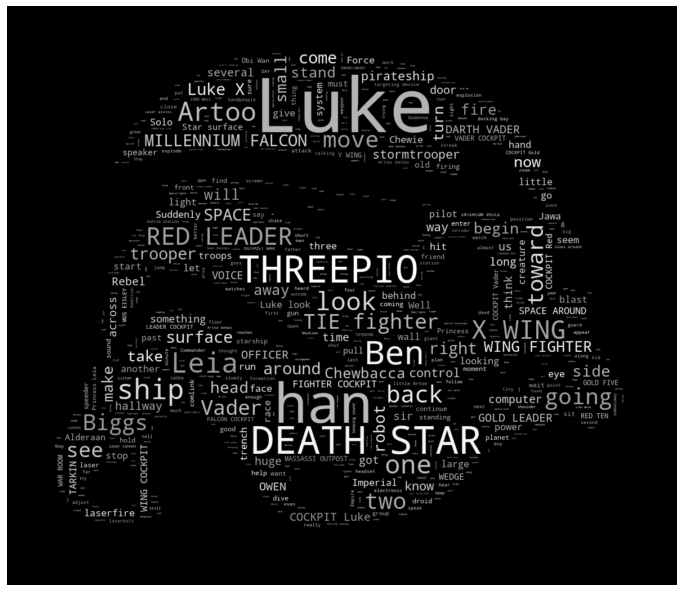

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
    interpolation='bilinear')
plt.axis('off')
plt.show()